# 1.1. Теоретический материал  – Нейронные сети

Обучение персептрона

Персептрон представляет собой элементарную часть нейронной сети.
Одиночный персептрон является линейным бинарным классификатором. В
этой лекции мы рассмотрим процедуру обучения персептрона для
классификации данных. Поскольку персептрон представляет собой
бинарный классификатор, то мы будем рассматривать лишь два класса.

Пусть мы рассматриваем некоторое множество (конечное или
бесконечное) n-мерных векторов, которые будем обозначать 𝑥 =
(𝑥1, 𝑥2, . . . , 𝑥𝑛)

Будем считать, что это множество разбивается на два класса, которые
мы будем обозначать +1 и -1. Поэтому возникает задача построения
функции, которая задана на нашем множестве векторов, и принимает
значения в множестве {+1, −1}. В качестве такой функции может выступать
персептрон. С алгебраической точки зрения персептрон состоит из вектора
весов 𝑤 = (𝑤0, 𝑤1, 𝑤2, . . . , 𝑤𝑛).

При этом персептрон работает по формуле
𝑦 = 𝑠𝑖𝑔𝑛(𝑤0 + 𝑥1𝑤1 + 𝑥2𝑤2 + . . . + 𝑥𝑛𝑤𝑛),
где функция 𝑠𝑖𝑔𝑛(𝑡) равна +1, если 𝑡 ≥ 0, и равна −1, если 𝑡 < 0.
Приведем алгоритм обучения персептрона. Пусть у нас есть набор
обучающих данных {(𝑥, 𝑑)}, где 𝑥 - это различные вектора, а 𝑑 из множества
{+1, −1} указывает к какому классу относится наш вектор.
1. Положим вектор весов 𝑤 равным нулю.
2. Повторять 𝑁 раз следующие шаги:
3. Для каждого тестового набора (𝑥, 𝑑):
4. Вычислить 𝑦 = 𝑠𝑖𝑔𝑛[(𝑥, 𝑤)].
5. Если 𝑦𝑑 < 0, то скорректировать веса 𝑤0 = 𝑤0 + 𝑎𝑑, 𝑤𝑖 =
𝑤𝑖 + 𝑎𝑑𝑥𝑖
, 𝑖 = 1,2, . . . , 𝑛.

Описанный алгоритм довольно легко программировать

# 1.1.1 Пример

_**Задача:**_ Рассмотрим программу обучения персептрона на языке Python. Сначала
рассмотрим основной класс персептрона, который умеет учиться по
тестовым данным.

In [2]:
# класс, который реализует персептрон и его обучение
class Perceptron:
    def __init__(self,N):
        self.w=list()
        for i in range(N):
            self.w.append(0)
    # метод для вычисления значения персептрона 
    def calc(self,x):
        res=0
        for i in range(len(self.w)):
            res=res+self.w[i]*x[i]
        return res
    # пороговая функция активации персептрона
    def sign(self,x):
        if self.calc(x)>0:
            return 1
        else:
            return -1
    # обучение на одном примере
    def learn(self,la,x,y):
        # обучаем только, когда результат неверный
        if y*self.calc(x)<=0:
            for i in range(len(self.w)):
                self.w[i]=self.w[i]+la*y*x[i]
    # обучение по всем данным T - кортеж примеров
    def learning(self,la,T):
        # цикл обучения
        for n in range(100):
            # обучение по всему набору примеров
            for t in T:
                self.learn(la,t[ 0], t[1])

В строке 25 мы осуществляем корректировку весов. Посмотрим, как учится
и работает наш персептрон.

In [3]:
# создаем класс двумерного персептрона
perceptron=Perceptron(2)
la=0.1 # константа обучения
# создаем примеры
T=list() 
T.append([[2,1],1])
T.append([[3,2],1])
T.append([[4,1],1])
T.append([[1,2],-1])
T.append([[2,3],-1])
T.append([[5,7],-1])
perceptron.learning(la,T) #обучение персептрона
print(perceptron.w) #печатаем веса 
# проверим работу на тестовых примерах
print(perceptron.sign([1.5,2]))
print(perceptron.sign([3,1.5]))
print(perceptron.sign([5,1]))
print(perceptron.sign([5,10]))

[0.1, -0.1]
-1
1
1
-1


Видим, что что наш персептрон отлично научился распознавать образы,
относя к классу 1 те вектора, у которых первая компонента больше второй,
и к классу -1 в противном случае. Хотя устройство персептронов довольно
простое эти конструкции могут решать и практические задачи. Кроме того,
из таких персептронов состоят нейронные сети.

# Теоретический материал – Реализация нейронной сети на Pyth

Нейронная сеть — это функциональная единица машинного или
глубокого обучения. Она имитирует поведение человеческого мозга,
поскольку основана на концепции биологических нейронных сетей.

Наиболее распространенный тип нейронной сети, называемый
многослойным персептроном (MLP), представляет собой функцию, которая
отображает входные данные в выходные данные. MLP имеет один входной
слой и один выходной слой. Между ними может быть один или несколько
скрытых слоев. Входной слой имеет тот же набор нейронов, что и признаки.
Скрытые слои также могут иметь более одного нейрона. Каждый нейрон
представляет собой линейную функцию, к которой применяется функция
активации для решения сложных задач. Выход каждого слоя подается в
качестве входных данных для всех нейронов следующих слоев.

Нейронные сети способны решать множество задач. В основном они
состоят из таких компонентов:

− входной слой (получение и передача данных);

− скрытый слой (вычисление);

− выходной слой. Чтобы реализовать нейросеть, необходимо
понимать, как ведут себя нейроны. Нейрон одновременно
принимает несколько входов, обрабатывает эти данные и выдает
один выход. Нейронная сеть представляет собой блоки ввода и
вывода, где каждое соединение имеет соответствующие веса (это
сила связи нейронов; чем вес больше, тем один нейрон сильнее
влияет на другой). Данные всех входов умножаются на веса:

− 𝑥 → 𝑥 ∗ 𝑤1;

− 𝑦 → 𝑦 ∗ 𝑤2.

Входы после взвешивания суммируются с прибавлением значения
порога «c»:

𝑥𝑤1 + 𝑦𝑤2 + 𝑐

Полученное значение пропускается через функцию активации
(сигмоиду), которая преобразует входы в один выход:

𝑧 = 𝑓(𝑥𝑤1 + 𝑦𝑤2 + 𝑐).

Так выглядит сигмоида:
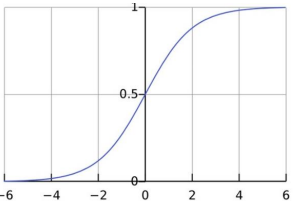
Интервал результатов сигмоиды — от 0 до 1. Отрицательные числа
стремятся к нулю, а положительные — к единице.
Например. Пусть нейрон имеет следующие значения: 𝑤 = [0,1] 𝑐 = 4.
Входной слой: 𝑥 = 2, 𝑦 = 3.

((𝑥𝑤1) + (𝑦𝑤2)) + 𝑐 = 20 + 31 + 4 = 7.

𝑧 = 𝑓(7) = 0.99.

# 1.2.1 Пример

Для написания кода нейрона будем использовать библиотеку Pytnon
— NumPy:

In [6]:
import numpy as np
def sigmoid(x):
    # Функция активации: f(x)= 1/(1+e^(-x))
    return 1/(1+np.exp(-x))
class Neuron:
    def __init__(self,weights,bias):
        self.weights = weights
        self.bias=bias
    def feedforward(self,inputs):
        total=np.dot(self.weights, inputs)+self.bias
        return sigmoid(total)
    
weights=np.array([0,1]) # w1=0, w2=1
bias=4 # c=4
n=Neuron(weights,bias)
x=np.array([2,3]) #x=2, y=3
print(n.feedforward(x)) #0.9990889488055994

0.9990889488055994


Нейросеть состоит из множества соединенных между собой нейронов.
Пример несложной нейронной сети
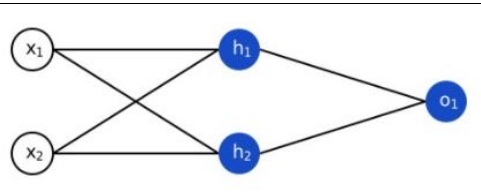
где:

𝑥1, 𝑥2 — входной слой;

ℎ1, ℎ2 — скрытый слой с двумя нейронами;

𝑜1 — выходной слой.

Например. Представим, что нейроны из графика выше имеют веса
[0, 1]. Пороговое значение (𝑏) у обоих нейронов равно 0 и они имеют
идентичную сигмоиду.
При входных данных 𝑥 = [2, 3] получим:

ℎ1 = ℎ2 = 𝑓(𝑤𝑥 + 𝑏) = 𝑓((02) + (1 ∗ 3) + 0) = 𝑓(3) = 0.95.

𝑜1 = 𝑓(𝑤 ∗ [ℎ1, ℎ2] + 𝑏) = 𝑓((0ℎ1) + (1ℎ2) + 0) = 𝑓(0.95) = 0.72.

Входные данные по нейронам передаются до тех пор, пока не
получатся выходные значения.

In [9]:
import numpy as np
class OurNeuralNetwork1:
    '''
    Данные нейросети:
        - два входа
        - два нейрона в скрытых слоях (h1, h2)
        - выход (o1)
    Нейроны имеют идентичные веса и пороги:
        - w = [0, 1]
        - b = 0
    '''
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Входы для o1 - это выходы h1, h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1

network = OurNeuralNetwork1()
x = np.array([2, 3])
print(network.feedforward(x)) #0.7216325609518421

0.7216325609518421


# Теоретический материал  – Обучение нейронной сети

Обучение нейросети — это подбор весов, которые соответствуют всем
входам для решения поставленных задач.
Класс нейронной сети:

In [10]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y        = y
        self.output   = np.zeros(self.y.shape)

Каждый этап процесса обучения состоит из:

− прямого распространения (прогнозируемый выход);

− обратного распространения (обновление весов и смещений).

Например:
Дана двуслойная нейросеть:

ŷ = 𝜎(𝑤2𝜎(𝑤1𝑥 + 𝑏1) + 𝑏2).

В данном случае на выход ŷ влияют только две переменные — 𝑤 (веса) и 𝑏
(смещение). Настройку весов и смещений из данных входа или процесс
обучения нейросети можно изобразить так:
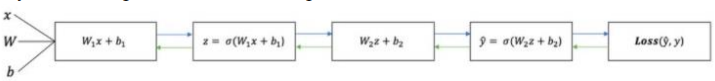

__Прямое распространение.__

Как видно, формула прямого распространения представляет собой
несложное вычисление:

ŷ = 𝜎(𝑤2𝜎(𝑤1𝑥 + 𝑏1) + 𝑏2)

Далее необходимо добавить в код функцию прямого распространения.
Предположим, что смещения в этом случае будут равны 0.

In [11]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y        = y
        self.output   = np.zeros(self.y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

Чтобы вычислить ошибку прогноза, необходимо использовать функцию
потери. В примере уместно воспользоваться формулой суммы квадратов
ошибок — средним значением между прогнозируемым и фактическим
результатами:

$$\textit{Error = }\sum_{i=1}^{n}(y-\hat{y})^2$$

__Обратное распространение__

Обратное распространение позволяет измерить производные в
обратном порядке — от конца к началу, и скорректировать веса и смещения.
Для этого необходимо узнать производную функции потери — тангенс угла
наклона.
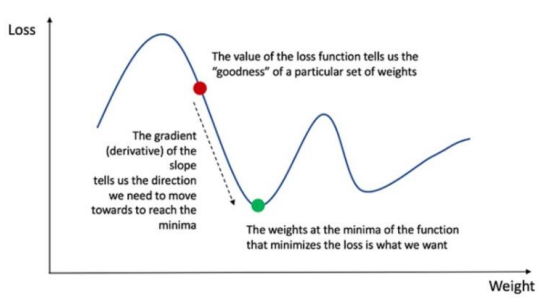
Производная функции по отношению к весам и смещениям позволяет
узнать градиентный спуск. Производная функции потери не содержит весов
и смещений, для ее вычисления необходимо добавить правило цепи:
$$\textit{Loss(y,}\hat{y}\textit{)=}\sum_{i=1}^{n}(y-\hat{y})^2$$
$$\textit{𝜕𝐿𝑜𝑠𝑠 (𝑦, 𝑦̂)/𝜕𝑊=𝜕𝐿𝑜𝑠𝑠 (𝑦, 𝑦̂)/𝜕𝑦̂ ∙ 𝜕𝑦̂/𝜕𝑧 ∙𝜕𝑧/𝜕𝑊}$$
$$\textit{= 2(𝑦 − 𝑦̂) ∙ производную сигмоиды ∙ 𝑥 =}$$ 
$$\textit{=2(𝑦 − 𝑦̂) ∙ 𝑧(1 − 𝑧) ∙ 𝑥,}$$

где 𝑧 = 𝑊𝑥 + 𝑏.

Благодаря этому правилу можно регулировать веса. Добавляем в код
Python функцию обратного распространения:


In [ ]:
class NN:
    def __init__(self, x, y):
        self.input    = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y        = y
        self.output   = np.zeros(self.y.shape)
    def feedforward(self, x):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    def backprob(self):
        # применение правила цепи для нахождения производной функции потерь по весу 2 и весу1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output)*sigmoid_derivative(self.output),
                                                  self.weights2.T)*sigmoid_derivative(self.layer1)))
        #  обновление веса производной (наклона) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2

Нейронные сети базируются на определенных алгоритмах и
математических функциях. Сначала может казаться, что разобраться в них
довольно сложно. Но существуют готовые библиотеки машинного обучения
для построения и тренировки нейросетей, позволяющие не углубляться в их
устройство

# Задание

_**Задача:**_ Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork.
Данные нейросети:

− три входа (𝑥1, 𝑥2, 𝑥3);

− три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);

− выход (𝑜1).

Нейроны имеют идентичные веса и пороги:

− 𝑤 = [0.5, 0.5, 0.5]

− 𝑏 = 0

Данные нейросети:

− два входа (𝑥1, 𝑥2);

− два нейрона в скрытых слоях (ℎ1, ℎ2);

− два выхода (𝑜1, 𝑜2
).

Нейроны имеют идентичные веса и пороги:

− 𝑤 = [1, 0];

− 𝑏 = 1.

In [9]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetwork:
    
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2, 3, 4])
print(network.feedforward(x))

0.8151036049051821


# Задание

_**Задача:**_ Реализуйте классы нейронных сетей с использованием других функций
активации.
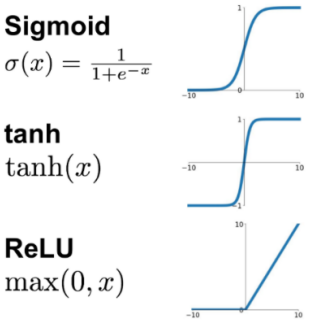

In [6]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class OurNeuralNetwork:
    
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2, 3, 4])
print(network.feedforward(x))

0.8151036049051821


In [31]:
import numpy as np

def tanh(x):
    return np.tanh(x)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)

class OurNeuralNetwork:
    
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2, 3, 4])
print(network.feedforward(x))

0.9050813365686774


In [7]:
import numpy as np

def ReLU(x):
    return max(0.0, x)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return ReLU(total)

class OurNeuralNetwork:
    
    def __init__(self):
        weights = np.array([0.5, 0.5, 0.5])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2, 3, 4])
print(network.feedforward(x))

6.75


# 1.2.  Введение в нейронные сети с помощью Scikit-Learn в Python

Теперь мы знаем, что такое нейронные сети и какие шаги необходимо
выполнить, чтобы построить простую нейронную сеть с плотными связями.
В этом разделе мы попытаемся построить простую нейронную сеть, которая
предсказывает класс, к которому принадлежит данное растение ириса. Мы
будем использовать библиотеку Python Scikit-Learn для создания нашей
нейронной сети.

Sklearn предоставляет 2 оценщика для задач классификации и
регрессии соответственно:

− MLPClassifier;

− MLPRegressor

Начнем с импорта необходимых библиотек.

In [8]:
#Загрузка библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

# MLPClassifer

Загрузка данных

Мы будем загружать два набора данных.

Набор данных цифр: мы будем использовать набор данных цифр,
который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем
использовать цифровые данные для задач классификации.

Набор данных о жилье в Бостоне: мы будем использовать набор
данных о жилье в Бостоне, который содержит информацию о различных
свойствах дома, таких как среднее количество комнат, уровень преступности
на душу населения в городе и т. д. Мы будем использовать его для задач
регрессии.

Sklearn предоставляет оба этих набора данных. Мы можем загрузить
их, вызвав методы load_digits() и load_boston().

In [9]:
from sklearn.datasets import load_digits

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Size: ', X_digits.shape, Y_digits.shape)

Dataset Size:  (1797, 64) (1797,)


In [15]:
from sklearn.datasets import load_boston

boston = load_boston()
X_boston, Y_boston = boston.data, boston.target
print('Dataset Size: ', X_boston.shape, Y_boston.shape)

Dataset Size:  (506, 13) (506,)


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

Классификация

MLPClassifier — это клвсс, доступный как часть модуля neuro_network
sklearn для выполнения задач классификации с использованием
многослойного персептрона.
Как обычно разделим набор данных на две части:

− данные обучения, которые будут использоваться для модели
обучения;

− тестовые данные, по которым будет проверяться точность
обученной модели.

Функция train_test_split модуля model_selection sklearn поможет нам
разделить данные на два набора: 80% для обучения и 20% для тестирования.
Мы также используем seed(random_state=123) с train_test_split, чтобы мы
всегда получали одно и то же разделение и могли сравнивать и
воспроизволить результаты в будущем.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits,
                        train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123)
print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes:  (1437, 64) (360, 64) (1437,) (360,)


Для начала натренируем модель MLPClassifier с параметрами по умолчанию
для тренировочных данных.

In [12]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(random_state=123)

In [13]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])
# Метод Score для оценки точности модели классификации
print('Test Accuracy: %.3f'%mlp_classifier.score(X_test, Y_test))

print('Training Accuracy: %.3f'%mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy: 0.983
Training Accuracy: 1.000


Cоздадим метод plot_confusion_matrix(), который принимает исходные и
предсказанные метки данных по модели. Затем он строит матрицу путаницы,
используя matplotlib.


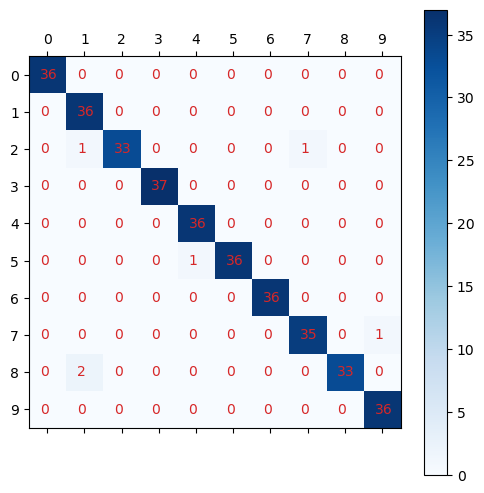

In [14]:
from sklearn.metrics import confusion_matrix

def plot_confussion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10),range(10))
    plt.xticks(range(10),range(10))
    plt.colorbar()
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2, j+0.1, str(conf_mat[j,i]), color='tab:red')
plot_confussion_matrix(Y_test, mlp_classifier.predict(X_test))

Ниже приведен список важных атрибутов, доступных с MLPClassifier,
которые могут предоставить значимую информацию после обучения
модели.

− loss_ — возвращает убыток после завершения процесса обучения.

− coefs_ — возвращает массив длины n_layers-1, где каждый элемент
представляет веса, связанные с уровнем i.

− intercepts_ — возвращает массив длины n_layers-1, где каждый
элемент представляет собой перехват, связанный с персептронами
слоя i.

− n_iter_ — количество итераций, для которых выполнялась оценка.

− out_activation_ — возвращает имя функции активации выходного
слоя.

In [ ]:
print('Loss:', mlp_classifier.loss_)
print('Number of Coefs:', len(mlp_classifier.coefs_))
print('Number of Intercepts:', len(mlp_classifier.intercepts_))
print('Number of Iterations for Which Estimator Ran:', mlp_classifier.n_iter_)
print('Number of Output Layer Activation Function:', mlp_classifier.out_activation_)

# MLPRegressor

MLPRegressor — это класс, доступный как часть библиотеки
neuro_network sklearn для выполнения задач регрессии с использованием
многослойного персептрона. Также разделим набор данных на две части:

− данные обучения (80%), которые будут использоваться для
модели обучения;

− тестовые данные (20%), по которым будет проверяться точность
обученной модели.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(random_state=123)
mlp_reg.fit(X_train,Y_train)

In [ ]:
Y_preds = mlp_reg.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])
#  Метод Score оценивает точность моделей классификации.
print('Test Accuracy: %.3f'%mlp_reg.score(X_test, Y_test))
print('Training Accuracy: %.3f'%mlp_reg.score(X_train, Y_train))

MLPRegressor имеет все атрибуты такие же, как и у MLPClassifier:


In [ ]:
print('Loss:', mlp_reg.loss_)

In [ ]:
print('Number of Coefs:', len(mlp_reg.coefs_))
[weights.shape for weights in mlp_reg.coefs_]

In [ ]:
print('Number of Iterations for Which Estimator Ran:', mlp_reg.n_iter_)
print('Number of Output Layer Activation Function:', mlp_reg.out_activation_)

# Задание

_**Задача:**_ Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.

Для классификации можете взять набор данных Ирисов:

https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

а для регрессии датасет зависимости заработной платы от опыта работы:

https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

url = r'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
dataset = pd.read_csv(url)

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, test_size = 0.20, stratify = Y, random_state = 123)

mlp_classifier = MLPClassifier(max_iter = 1000).fit(X_train, Y_train)
Y_pred = mlp_classifier.predict(X_test)

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
print(df)

print("\nTest Accuracy: %.3f"%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy: %.3f'%mlp_classifier.score(X_train, Y_train))
print(f"\nMatrix of Confusion:\n {confusion_matrix(Y_test, Y_pred)}")
print(f"\nLoss : ", mlp_classifier.loss_)
print(f'Number of Coefs : ', len(mlp_classifier.coefs_))
print(f'Number of Intercepts : ', len(mlp_classifier.intercepts_))
print(f'Number of Iterations for Which Estimator Run : ', mlp_classifier.n_iter_)
print(f'Name of Output Layer Activation Function : ', mlp_classifier.out_activation_)

        Actual   Predicted
0   Versicolor  Versicolor
1       Setosa      Setosa
2    Virginica   Virginica
3    Virginica   Virginica
4       Setosa      Setosa
5       Setosa      Setosa
6    Virginica   Virginica
7   Versicolor   Virginica
8    Virginica   Virginica
9       Setosa      Setosa
10      Setosa      Setosa
11  Versicolor  Versicolor
12   Virginica   Virginica
13  Versicolor  Versicolor
14   Virginica   Virginica
15  Versicolor  Versicolor
16      Setosa      Setosa
17      Setosa      Setosa
18      Setosa      Setosa
19      Setosa      Setosa
20      Setosa      Setosa
21   Virginica   Virginica
22   Virginica   Virginica
23  Versicolor  Versicolor
24   Virginica   Virginica
25   Virginica   Virginica
26  Versicolor  Versicolor
27  Versicolor  Versicolor
28  Versicolor   Virginica
29  Versicolor  Versicolor

Test Accuracy: 0.933
Training Accuracy: 0.992

Matrix of Confusion:
 [[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]

Loss :  0.04894546956386635
Number of Coefs :  2
Number

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
data = pd.read_csv(url)
#print(dataset.head())

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

#Оценка качества модели:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("R2 score: %.2f" % r2_score(y_test, y_pred))

print(mlp.n_layers_) 
print(mlp.hidden_layer_sizes) 
print(mlp.coefs_)

Mean squared error: 549461627.69
R2 score: 0.49
4
(100, 50)
[array([[ 1.92296734e+00,  1.75451565e+00,  1.77559005e+00,
         1.78601153e+00,  1.92513110e+00,  1.64587586e+00,
         1.69545488e+00, -7.54779971e-07,  1.96392599e+00,
         1.89050528e+00,  9.12014020e-26,  1.91029514e+00,
         1.92885863e+00,  1.68336341e+00,  5.03073397e-24,
         1.53557865e+00,  1.73141880e+00,  1.75184087e+00,
         1.77612393e+00,  1.44989562e-22,  4.45056287e-23,
        -2.02684512e-06,  1.75386441e+00,  1.68796204e+00,
        -1.47898526e-01,  1.77067699e+00, -2.55016404e-06,
        -5.14672129e-06,  1.84790923e+00,  1.49826403e+00,
         1.93572093e+00, -3.06747633e-24,  1.84663084e+00,
         1.91419118e+00,  1.69121216e+00,  1.53217837e+00,
         1.74334705e+00,  1.84316078e+00, -7.00612333e-24,
        -1.29979448e-20,  1.84125703e+00,  1.78036113e+00,
        -6.84921359e-24, -5.85305559e-02, -5.82866832e-11,
         1.58672511e+00,  1.81214910e+00,  1.94600329e

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
